# Projekt praktyczny (regresja)

## Zbiór danych *Life Expectancy Data.csv* następujące kolumny:
- Country - państwo\
- Status - kraj rozwijający się / rozwinięty\
- Life expectancy - oczekiwana długość życia w latach\
- Adult Mortality - śmiertelność wśród dorosłych, prawdopodobieństwo śmierci w wieku między 15 a 60 lat na 1000 osób\
- infant deaths - śmiertelnośc noworodków w przeliczeniu na 1000 urodzeń\
- Alcohol - konsumpcja alkoholu wśród osób 15+ [w litrach]\
- percentage expenditure - udział wydatków na sektor zdrowia w PKB per capita\
- Hepatitis B - udział zaszczepionych dzieci do 1 roku życia na WZW typu B\
- Measles - liczba odnotowanych przypadków zachorowań na odrę na 1000 mieszkańców\
- BMI\
- under-five deaths - liczba śmierci na 1000 dzieci poniżej 5 roku życia\
- Polio - udział zaszczepionych dzieci do 1 roku życia na Polio\
- Total expenditure - udział wydatków na sektor zdrowia w całości wydatków rządowych\
- Diphtheria - udział zaszczepionych dzieci do 1 roku życia na błonicę i krztusiec\
- HIV/AIDS - śmierci dzieci poniżej 5 roku życia na 1 000 żywych urodzeń spowodowane HIV/AIDS\
- GDP - PKB per capita\
- Population - liczba mieszkańców\
- thinness 1-19 years - rozpowszechnienie chudości w wieku 1 -19 lat\
- thinness 5-9 years - rozpowszechnienie chudości w wieku 5 - 9 lat\
- Income composition of resources - Wskaźnik rozwoju społecznego HDI Human Development Index\
- Schooling - liczba lat nauczania szkolnego\

# Celem projektu jest:
1. przygotowanie i analiza dostarczonych danych
2. budowa i analiza jakości modeli do prognozy oczekiwanej długości życia w latach
3. ocena opracowanych modeli

## Zaimportuj biblioteki

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Wczytaj plik *Life Expectancy Data.csv* oraz wyświetl kilka pierwszych wierszy



In [143]:
df = pd.read_csv('Life_Expectancy_Data.csv',delimiter=";")

# Preprocessing
- wyświetl rozmiar zbioru
- sprawdź ilość NaN-ów
- jesli występują kolumny z dużą lością NaN-ów usuń je
- sprawdź statystyki NaN-ów dla wierszy (m.in. jaka jest mininalna, maxymalna, srednia liczba nanów w wierszu). Jeśli są wiersze, dla których jest >=5 braki usuń je i zresetuj indexy
- wyświetl wiersze od 170 do 175
- pozostałe NaN-y uzupełnij średnią
- oblicz statystyki opisowe

In [144]:
print(f"Rozmiar zbioru: {df.shape[0]} x {df.shape[1]}")
nan_counts = df.isna().sum()
print("Liczba Nan:")
nan_counts

Rozmiar zbioru: 183 x 21
Liczba Nan:


Country                              0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            177
percentage expenditure               0
Hepatitis B                          9
Measles                              0
BMI                                  2
under-five deaths                    0
Polio                                0
Total expenditure                  181
Diphtheria                           0
HIV/AIDS                             0
GDP                                 29
Population                          41
thinness 1-19 years                  2
thinness 5-9 years                   2
Income composition of resources     10
Schooling                           10
dtype: int64

In [145]:
threshold = len(df) * 0.7
columns_to_drop = nan_counts[nan_counts > threshold].index
df = df.drop(columns=columns_to_drop)
print("Dataframe po usunieciu kolumn z liczba pustych komorek wieksza niz 70% dlugosci zbioru:")
df.head(5)

Dataframe po usunieciu kolumn z liczba pustych komorek wieksza niz 70% dlugosci zbioru:


,Country,Status,Life expectancy,Adult Mortality,infant deaths,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,Developing,65.0,263.0,62,71.279624,65.0,1154,19.1,83,6.0,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Albania,Developing,77.8,74.0,0,364.975229,99.0,0,58.0,0,99.0,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
2,Algeria,Developing,75.6,19.0,21,0.000000,95.0,63,59.5,24,95.0,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
3,Angola,Developing,52.4,335.0,66,0.000000,64.0,118,23.3,98,7.0,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
4,Antigua and Barbuda,Developing,76.4,13.0,0,0.000000,99.0,0,47.7,0,86.0,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9


In [146]:
# Obliczanie liczby NaN-ów w każdym wierszu
nan_counts_rows = df.isna().sum(axis=1)

# Wyświetlanie statystyk NaN-ów w wierszach
print("Minimalna liczba NaN-ów w wierszu:", nan_counts_rows.min())
print("Maksymalna liczba NaN-ów w wierszu:", nan_counts_rows.max())
print("Średnia liczba NaN-ów w wierszu:", nan_counts_rows.mean())

df = df.drop(df[nan_counts_rows >= 5].index).reset_index(drop=True)

Minimalna liczba NaN-ów w wierszu: 0
Maksymalna liczba NaN-ów w wierszu: 5
Średnia liczba NaN-ów w wierszu: 0.5737704918032787


In [156]:
df.iloc[170:176]

,Country,Status,Life expectancy,Adult Mortality,infant deaths,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
170,Ukraine,Developing,71.3,195.0,4,0.0,22.0,105,61.3,5,51.0,23.0,0.2,2124.662666,4.515429e+06,2.3,2.4,0.74800,15.300000
171,United Arab Emirates,Developing,77.1,75.0,1,0.0,99.0,347,64.2,1,99.0,99.0,0.1,3911.746890,1.109741e+07,5.3,5.1,0.83600,13.300000
172,United Republic of Tanzania,Developing,61.8,279.0,85,0.0,98.0,30,23.8,119,96.0,98.0,1.4,7185.331746,1.109741e+07,6.7,6.5,0.69174,12.927168
173,United States of America,Developed,79.3,13.0,23,0.0,92.0,188,69.6,26,93.0,95.0,0.1,7185.331746,1.109741e+07,0.8,0.6,0.69174,12.927168
174,Uruguay,Developing,77.0,116.0,0,0.0,95.0,0,64.0,0,95.0,95.0,0.1,15524.842470,3.431552e+06,1.5,1.4,0.79400,15.500000
175,Uzbekistan,Developing,69.4,184.0,15,0.0,99.0,22,44.7,17,99.0,99.0,0.1,2137.576852,3.129890e+05,3.0,3.1,0.69700,12.100000


In [159]:

numeric_columns = df.select_dtypes(include=np.number).columns


df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

print("\nDataFrame po uzupełnieniu pozostałych NaN-ów średnią wartością tylko dla zmiennych numerycznych:")
df.head(5)


DataFrame po uzupełnieniu pozostałych NaN-ów średnią wartością tylko dla zmiennych numerycznych:


,Country,Status,Life expectancy,Adult Mortality,infant deaths,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,Developing,65.0,263.0,62,71.279624,65.0,1154,19.1,83,6.0,65.0,0.1,584.259210,3.373649e+07,17.2,17.3,0.479,10.1
1,Albania,Developing,77.8,74.0,0,364.975229,99.0,0,58.0,0,99.0,99.0,0.1,3954.227830,2.887300e+04,1.2,1.3,0.762,14.2
2,Algeria,Developing,75.6,19.0,21,0.000000,95.0,63,59.5,24,95.0,95.0,0.1,4132.762920,3.987153e+07,6.0,5.8,0.743,14.4
3,Angola,Developing,52.4,335.0,66,0.000000,64.0,118,23.3,98,7.0,64.0,1.9,3695.793748,2.785935e+06,8.3,8.2,0.531,11.4
4,Antigua and Barbuda,Developing,76.4,13.0,0,0.000000,99.0,0,47.7,0,86.0,99.0,0.2,13566.954100,1.109741e+07,3.3,3.3,0.784,13.9


In [158]:
statistics = df.describe()

print("Statystyki opisowe:")
statistics

Statystyki opisowe:


,Life expectancy,Adult Mortality,infant deaths,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,1.820000e+02,182.000000,182.000000,182.000000,182.000000
mean,71.564286,153.324176,23.917582,2.397005,82.425287,1510.659341,42.621667,31.763736,83.137363,84.571429,0.663736,7185.331746,1.109741e+07,4.555556,4.597778,0.691740,12.927168
std,8.114743,97.630430,83.900288,27.536214,23.471921,7863.325029,20.551768,108.057506,24.293960,22.207780,1.347764,10754.737453,2.556250e+07,4.078596,4.158675,0.149549,2.839036
min,51.000000,1.000000,0.000000,0.000000,6.000000,0.000000,2.500000,0.000000,5.000000,6.000000,0.100000,33.681223,2.966000e+03,0.100000,0.100000,0.347000,4.900000
25%,65.725000,74.250000,0.000000,0.000000,81.000000,0.000000,24.300000,0.000000,83.000000,83.250000,0.100000,1149.336165,5.961512e+05,1.525000,1.500000,0.575250,11.100000
50%,73.750000,138.500000,2.000000,0.000000,92.000000,16.500000,48.500000,3.000000,93.000000,93.000000,0.100000,4129.940335,5.495754e+06,3.500000,3.400000,0.718000,12.963584
75%,76.850000,214.000000,17.000000,0.000000,97.000000,204.000000,61.300000,21.000000,97.000000,97.000000,0.400000,7185.331746,1.109741e+07,6.500000,6.400000,0.794750,14.875000
max,88.000000,484.000000,910.000000,364.975229,99.000000,90387.000000,77.600000,1100.000000,99.000000,99.000000,9.300000,66346.522670,2.581621e+08,26.700000,27.300000,0.948000,20.400000


# Wizualizacja

Wykonaj wykresy rozkładu (histogram i ramka-wąsy) zmiennej *Life expectancy* skategoryzowane w zalezności od statusu kraju. Zinterpretuj wyniki.

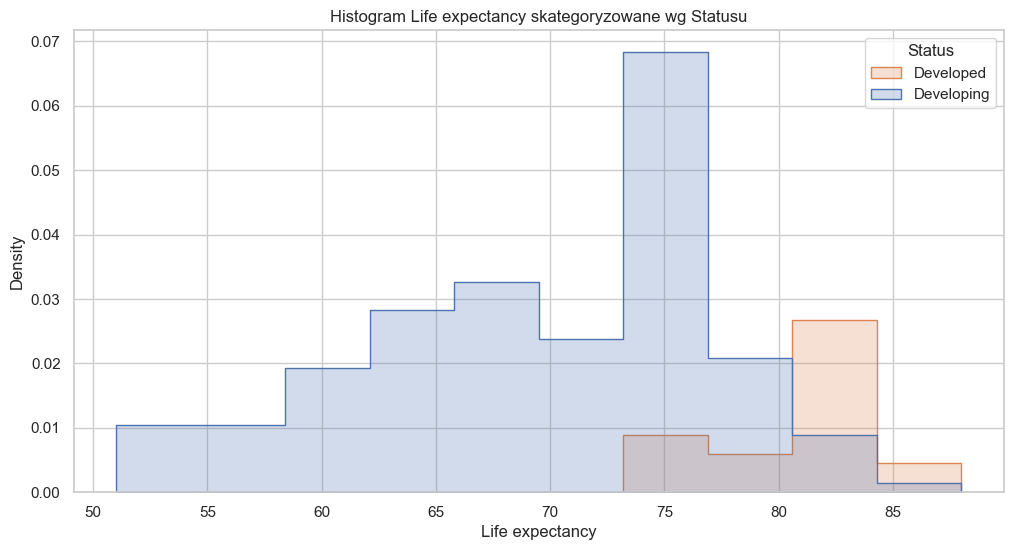

In [150]:
# Zakładamy, że kolumny nazywają się 'Life expectancy' i 'Status'
life_expectancy = df['Life expectancy']
status = df['Status']

# Ustawienie stylu wykresów
sns.set(style="whitegrid")

# Wykres histogramu
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Life expectancy', hue='Status', kde=False, element='step', stat='density')
plt.title('Histogram Life expectancy skategoryzowane wg Statusu')
plt.xlabel('Life expectancy')
plt.ylabel('Density')
# Dodanie legendy
plt.legend(title='Status', labels=['Developed', 'Developing'])
plt.show()



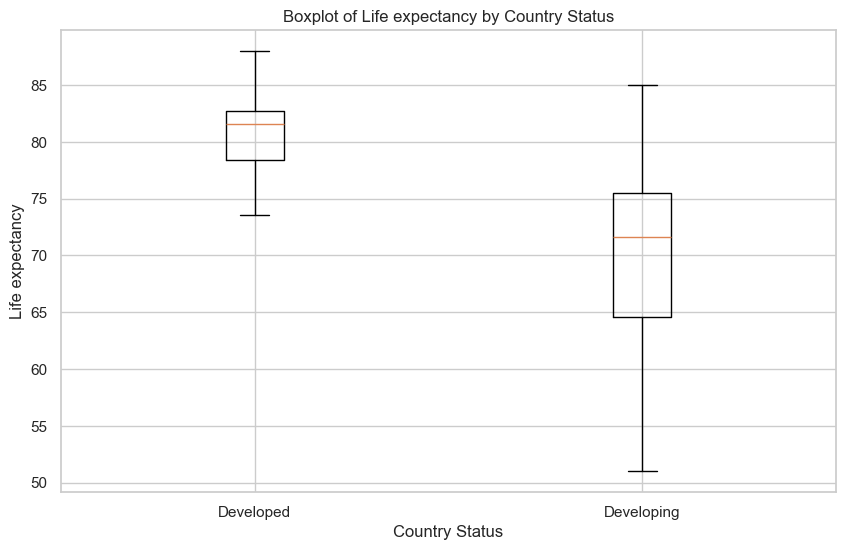

In [151]:
# Wykres ramki-wąsów (boxplot) Life expectancy skategoryzowany według statusu kraju
plt.figure(figsize=(10, 6))
plt.boxplot([df[df['Status'] == 'Developed']['Life expectancy'].dropna(),
             df[df['Status'] == 'Developing']['Life expectancy'].dropna()],
            labels=['Developed', 'Developing'])
plt.xlabel('Country Status')
plt.ylabel('Life expectancy')
plt.title('Boxplot of Life expectancy by Country Status')
plt.show()

Na podstawie wykresów możemy stwierdzić że w krajach rozwijających się oczekiwana długość życia mieszkańców oscyluje w okolicach 70 - 80 lat.
W krajach rozwiniętych ta wartość wzrasta do 80 - 85 lat.

# Korelacja
Wykonaj macierz korelacji dla zmiennych ilościowych. Z którymi zmiennymi skorelowana jest zmienna *Life expectancy*. Zinterpretuj te korelacje.

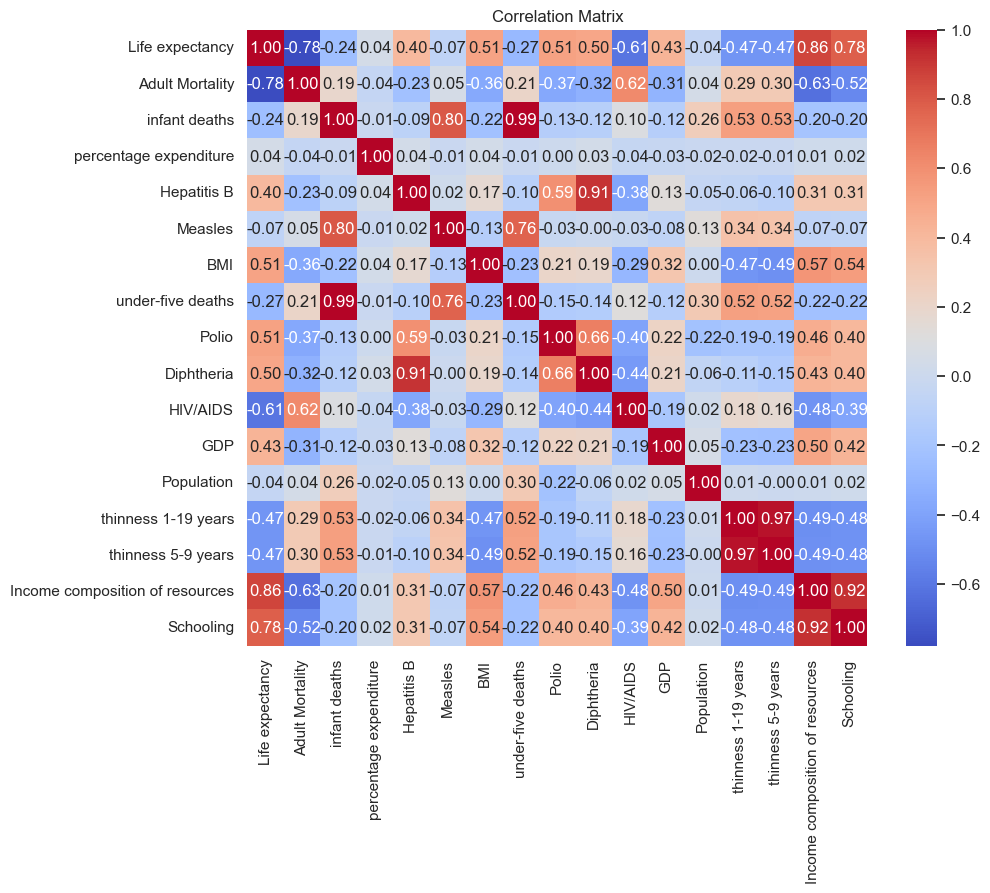

In [152]:
# Wybierz tylko zmienne liczbowe
numeric_variables = df.select_dtypes(include='number')

# Oblicz macierz korelacji
correlation_matrix = numeric_variables.corr()

# Wygeneruj mapę ciepła dla macierzy korelacji
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### Zmienne mocno ze sobą skorelowane |R| > 0.75:
- Oczekiwana długość życia - Śmiertelność wśród dorosłych (R = -0.78)
- Liczba odnotowanych przypadków zachorowania na odrę - Śmiertelność noworodków (R = 0.8)
- Liczba śmierci dzieci poniżej 5 roku życia - Śmiertelność noworodków (R = 0.99)
- Liczba śmierci dzieci poniżej 5 roku życia - Liczba odnotowanych przypadków zachorowania na odrę (R = 0.76)
- Udział zaszczszepionych dzieci na błonicę i ksztusiec - Udział zaszczszepionych dzieci na WZW typu B (R = 0.91)
- Rozpowszechnienie chudości w wieku 5 - 9 lat - Rozpowszechnienie chudości w wieku 1 - 19 lat (R = 0.97)
- Oczekiwana długość życia - Wzkaźnik rozwoju społecznego HDI (R = 0.86)
- Oczekiwana długość życia - Liczba lat nauczania szkolnego (R = 0.78)
- Liczba lat nauczania szkolnego - Wzkaźnik rozwoju społecznego HDI (R = 0.92)


# Podziel zbiór danych na zbiór treningowy i trainowy w stodunku 80% do 20%.

In [153]:
from sklearn.model_selection import train_test_split

# Podziel zbiór danych na zbiór treningowy i testowy w stosunku 80% do 20%
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Wyświetl liczbę wierszy w każdym zbiorze danych
print("Liczba wierszy w zbiorze treningowym:", len(train_data))
print("Liczba wierszy w zbiorze testowym:", len(test_data))

Liczba wierszy w zbiorze treningowym: 145
Liczba wierszy w zbiorze testowym: 37


# Regresja linowa jednej zmiennej
- Zbuduj model regresji liniowej prostej (jednej zmiennej) umozliwijący przewidywanie długości życia. Odpowiednio przygotuj X (zmienna objaśniająca) i y (zmienna objasniana).
- Wykonaj predykcję dla zbioru treningowego i testowego
- Oblicz metryki (R2, MAE, MSE, RMSE). Oceń jakość modelu (dobrze dopasowany, przetrenowany, niedotrenowany).

In [154]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Przygotowanie danych
X_train = train_data[['Life expectancy']]
y_train = train_data['Adult Mortality']

X_test = test_data[['Life expectancy']]
y_test = test_data['Adult Mortality']

# Inicjalizacja i dopasowanie modelu regresji liniowej
model = LinearRegression()
model.fit(X_train, y_train)

# Wykonaj predykcję dla zbioru treningowego i testowego
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Oblicz metryki
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

# Oblicz metryki
r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)

# Wyświetlenie metryk
print("Metryki oceny modelu testowego:")
print("R^2:", r2_test)
print("MAE:", mae_test)
print("MSE:", mse_test)
print("RMSE:", rmse_test)

# Wyświetlenie metryk
print("\nMetryki oceny modelu treningowego:")
print("R^2:", r2_train)
print("MAE:", mae_train)
print("MSE:", mse_train)
print("RMSE:", rmse_train)

print("\nModel treningwy jest niedotrenowany")


Metryki oceny modelu testowego:
R^2: 0.6977218741117495
MAE: 36.703257417201684
MSE: 2796.197638475998
RMSE: 52.87908507601089

Metryki oceny modelu treningowego:
R^2: 0.5778868481477248
MAE: 39.201158873453274
MSE: 3997.9502868908344
RMSE: 63.22934672199954

Model treningwy jest niedotrenowany


# Regresja linowa wielu zmiennych
- Zbuduj model regresji liniowej wielu zmiennych umozliwijący przewidywanie długości życia. Odpowiednio przygotuj X (zmienne objaśniające) i y (zmienna objasniana).
- Wykonaj predykcję dla zbioru treningowego i testowego
- Oblicz metryki (R2, MAE, MSE, RMSE). Oceń jakość modelu (dobrze dopasowany, przetrenowany, niedotrenowany).

In [155]:
# Wybierz tylko zmienne numeryczne
numeric_variables = df.select_dtypes(include=np.number)

# Podziel dane na zbiór treningowy i testowy
X = numeric_variables.drop('Life expectancy', axis=1)
y = numeric_variables['Life expectancy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicjalizacja i dopasowanie modelu regresji liniowej
model = LinearRegression()
model.fit(X_train, y_train)

# Wykonaj predykcję dla zbioru treningowego i testowego
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Oblicz metryki
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

# Oblicz metryki
r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)

# Wyświetlenie metryk
print("Metryki oceny modelu testowego:")
print("R^2:", r2_test)
print("MAE:", mae_test)
print("MSE:", mse_test)
print("RMSE:", rmse_test)

# Wyświetlenie metryk
print("\nMetryki oceny modelu treningowego:")
print("R^2:", r2_train)
print("MAE:", mae_train)
print("MSE:", mse_train)
print("RMSE:", rmse_train)

print("\nModel treningwy jest dopasowany")


Metryki oceny modelu testowego:
R^2: 0.8194252206319195
MAE: 2.8484154343451187
MSE: 13.856767767687206
RMSE: 3.722467967315126

Metryki oceny modelu treningowego:
R^2: 0.876636260228587
MAE: 2.0832769907333026
MSE: 7.724618446506347
RMSE: 2.779319781260578

Model treningwy jest przetrenowamy
